In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
!pip install QuantLib
import QuantLib as ql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.7 MB/s eta 0:00:00


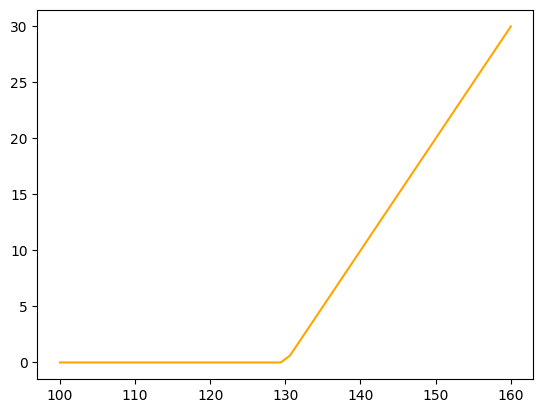

In [14]:
K=130
S_T = np.linspace(100,160,50)
plt.plot(S_T,np.fmax(S_T - K,0),color='orange')
plt.show()

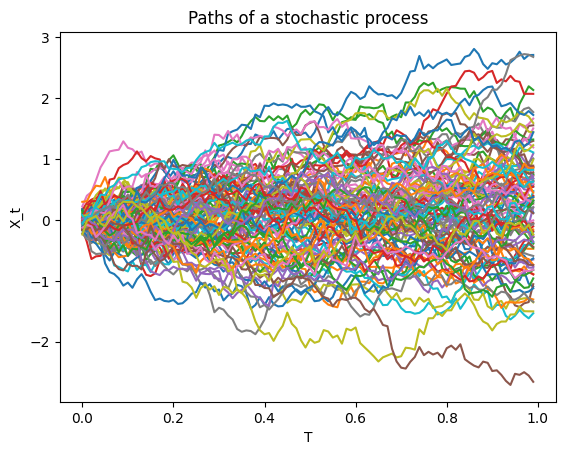

In [20]:
dt = 1./100.
T = np.arange(0, 1, dt)
for i in range(0,100):
    X = np.cumsum(np.sqrt(dt) * np.random.randn(T.shape[0]))
    plt.plot(T,X)
plt.xlabel("T")
plt.ylabel("X_t")
plt.title("Paths of a stochastic process");

In [23]:
def MCSimulation1(N):
    x = np.linspace(-1,1)
    y = np.sqrt(1-x**2)
    plt.plot(x,y, color='b')
    plt.plot(x,-y, color='b')
    dart = np.random.uniform(-1,1, size=(2,N))
    getroffen = np.sum(dart**2, axis=0)<=1
    plt.scatter(dart[0,~getroffen], dart[1,~getroffen], color='r')
    plt.scatter(dart[0,getroffen], dart[1,getroffen], color='b')
    plt.title("Dart throwing N=%i"%N)
    plt.show()
    print("Pi = %f" % (4.*float(np.sum(getroffen))/float(N)) )

np.random.seed(1)

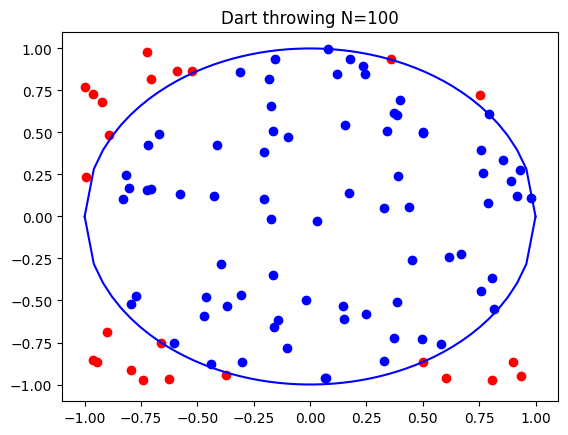

Pi = 3.040000


In [24]:
MCSimulation1(100)

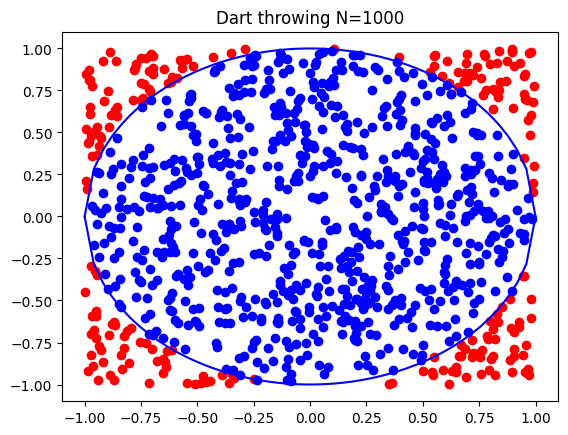

Pi = 3.096000


In [25]:
MCSimulation1(1000)

In [29]:
def d1(S0, K, r, sigma, T):
    return (np.log(S0/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))

def d2(S0, K, r, sigma, T):
    return (np.log(S0 / K) + (r - sigma**2 / 2) * T) / (sigma * np.sqrt(T))

def BlackScholesCall(S0, K, r, sigma, T):
    return S0 * ss.norm.cdf(d1(S0, K, r, sigma, T)) - K * np.exp(-r * T) * ss.norm.cdf(d2(S0, K, r, sigma, T))

def payOff(S_T,K,T,r):
  return np.fmax(S_T,- K,0)*np.exp(-r*t)

def pathGeneration(N, S_0, sigma, r, T, dt):
  t = np.arange(0, T+dt, dt)
  dW = np.sqrt(dt) * np.random.randn(N, len(t)-1)
  S = np.zeros((N, len(t)))
  S[:, 0] = S_0
  S[:,1:] = S_0*np.cumprod(np.exp((r-sigma**2/2)*dt+sigma*dW), axis=1)
  return t, S

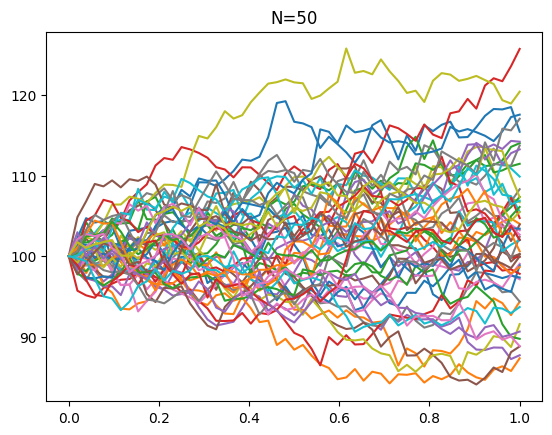

In [33]:
t, S1 = pathGeneration(100, 100, 0.1, 0.03, 1, 1/52.)

for i in range(0, 50):
    plt.plot(t, S1[i,:])
    plt.title("N=50")

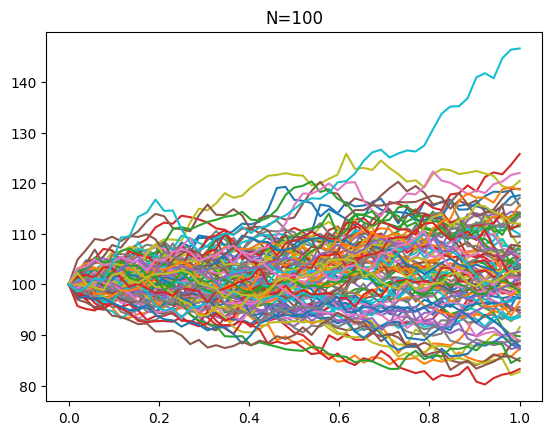

In [34]:
for i in range(0, 100):
    plt.plot(t, S1[i,:])
    plt.title("N=100")

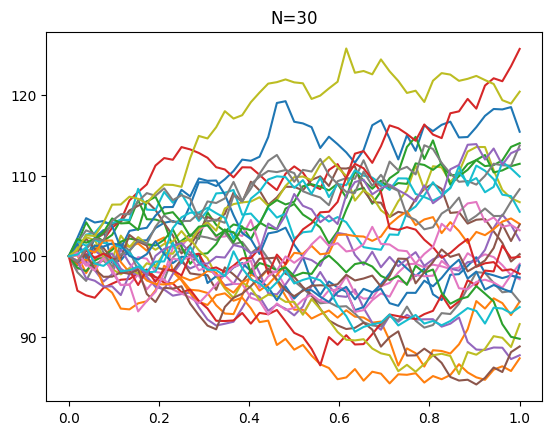

In [36]:
for i in range(0, 30):
    plt.plot(t, S1[i,:])
    plt.title("N=30")

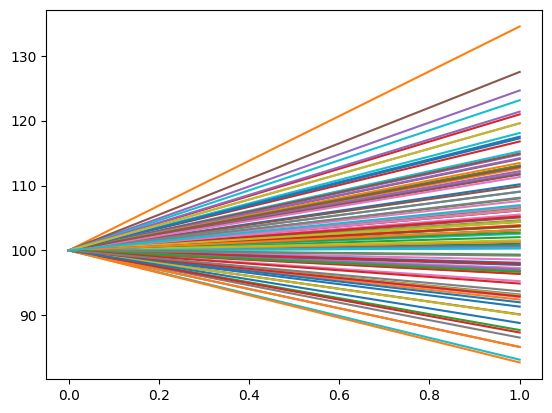

In [37]:
N = 10000
t, S = pathGeneration(N, 100, 0.1, 0.03, 1, 1)

for i in range(0, 100):
    plt.plot(t, S[i,:])